<a href="https://colab.research.google.com/github/calel95/small-projects/blob/master/An%C3%A1lise%20de%20dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
#Carregando a tabela
vendas = pd.read_excel("/content/drive/MyDrive/Datasets/Vendas - Dez.xlsx")
vendas

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário
0,65014,2019-12-01,Shopping Morumbi,Sunga Listrado,5,114
1,65014,2019-12-01,Shopping Morumbi,Casaco Listrado,1,269
2,65016,2019-12-01,Iguatemi Campinas,Sapato Listrado,2,363
3,65016,2019-12-01,Iguatemi Campinas,Casaco,1,250
4,65017,2019-12-01,Shopping SP Market,Gorro Liso,3,92
...,...,...,...,...,...,...
7084,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102
7085,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270
7086,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87
7087,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108


In [28]:
#Verificando se tem registros nulos
vendas.isnull().sum()

Código Venda      0
Data              0
Nome Loja         0
Produto           0
Quantidade        0
Valor Unitário    0
Valor Total       0
dtype: int64

In [27]:
#Verificando o tipo de dados para ver se precisa trocar
vendas.dtypes

Código Venda               int64
Data              datetime64[ns]
Nome Loja                 object
Produto                   object
Quantidade                 int64
Valor Unitário             int64
Valor Total                int64
dtype: object

In [24]:
#Trocando o nome de uma coluna
vendas.rename(columns={"ID Loja":"Nome Loja"}, inplace=True)
vendas

,Código Venda,Data,Nome Loja,Produto,Quantidade,Valor Unitário
0,65014,2019-12-01,Shopping Morumbi,Sunga Listrado,5,114
1,65014,2019-12-01,Shopping Morumbi,Casaco Listrado,1,269
2,65016,2019-12-01,Iguatemi Campinas,Sapato Listrado,2,363
3,65016,2019-12-01,Iguatemi Campinas,Casaco,1,250
4,65017,2019-12-01,Shopping SP Market,Gorro Liso,3,92
...,...,...,...,...,...,...
7084,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102
7085,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270
7086,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87
7087,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108


In [25]:
#Criando a coluna de valor total
vendas["Valor Total"] = vendas["Quantidade"] * vendas["Valor Unitário"]

In [33]:
#Criando as colunas dia, mes e ano, e removendo a colona Data, pois só muda o dia
vendas["Ano Venda"] = vendas.Data.dt.year
vendas["Mes Venda"] = vendas.Data.dt.month
vendas["Dia Venda"] = vendas.Data.dt.day
vendas.drop(["Data"], axis=1, inplace=True)

,Código Venda,Data,Nome Loja,Produto,Quantidade,Valor Unitário,Valor Total,Ano Venda,Mes Venda,Dia Venda
0,65014,2019-12-01,Shopping Morumbi,Sunga Listrado,5,114,570,2019,12,1
1,65014,2019-12-01,Shopping Morumbi,Casaco Listrado,1,269,269,2019,12,1
2,65016,2019-12-01,Iguatemi Campinas,Sapato Listrado,2,363,726,2019,12,1
3,65016,2019-12-01,Iguatemi Campinas,Casaco,1,250,250,2019,12,1
4,65017,2019-12-01,Shopping SP Market,Gorro Liso,3,92,276,2019,12,1
...,...,...,...,...,...,...,...,...,...,...
7084,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204,2019,12,26
7085,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080,2019,12,26
7086,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87,2019,12,26
7087,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108,2019,12,26


Text(0, 0.5, 'Venda')

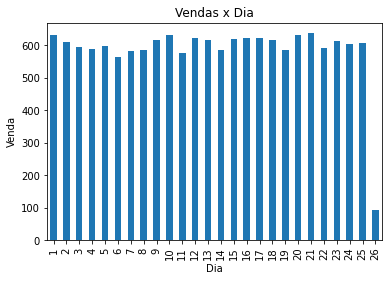

In [95]:
#Quantidade de vendas por dia
vendas.groupby("Dia Venda")["Quantidade"].sum()
#Gráfico
vendas.groupby("Dia Venda")["Quantidade"].sum().plot.bar(title="Vendas x Dia")
plt.xlabel("Dia")
plt.ylabel("Venda")

In [50]:
#Convertendo a coluna valor total em float e depois formatando pra apresentar os separadores de milhar no modelo americano
vendas["Valor Total"] = vendas["Valor Total"].astype("float")
pd.options.display.float_format = '{:,.2f}'.format

In [108]:
#Valor total de vendas por loja
vendas.groupby("Nome Loja")["Valor Total"].sum().sort_values(ascending=True)


Nome Loja
Shopping Center Leste Aricanduva    86,156.00
Novo Shopping Ribeirão Preto        99,703.00
Norte Shopping                     101,491.00
Shopping Barra                     103,148.00
Iguatemi Esplanada                 103,342.00
Shopping Center Interlagos         103,821.00
Shopping Midway Mall               105,269.00
Shopping Ibirapuera                107,907.00
Shopping SP Market                 110,833.00
Passei das Águas Shopping          112,089.00
Ribeirão Shopping                  112,936.00
Shopping Vila Velha                115,896.00
Shopping União de Osasco           116,032.00
Shopping Morumbi                   117,936.00
Palladium Shopping Curitiba        120,621.00
Parque Dom Pedro Shopping          122,055.00
Shopping Iguatemi Fortaleza        124,182.00
Shopping Eldorado                  124,339.00
Center Shopping Uberlândia         124,960.00
Bourbon Shopping SP                125,850.00
Rio Mar Shopping Fortaleza         127,890.00
Salvador Shopping       

In [77]:
#Verificando a quantidade de vendas de acorod com seu id de venda
vendas["Código Venda"].value_counts().count()

3787

In [111]:
#Verificando a quantidade e o valor total arrecadado de cada produto
vendas.groupby("Produto")["Quantidade","Valor Total"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Quantidade,Valor Total
Produto,,
Bermuda,123,"18,450.00"
Bermuda Estampa,110,"18,590.00"
Bermuda Linho,131,"25,545.00"
Bermuda Liso,119,"18,683.00"
Bermuda Listrado,124,"20,212.00"
...,...,...
Tênis Estampa,125,"32,000.00"
Tênis Linho,119,"34,986.00"
Tênis Liso,128,"34,048.00"


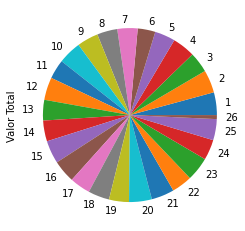

In [122]:
vendas.groupby("Dia Venda")["Valor Total"].sum().plot.pie()